<a href="https://colab.research.google.com/github/4GeeksAcademy/bosques-aleatorios/blob/main/Bosques_aleatorios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Bosques aleatorios para clasificacion

In [9]:
import pandas as pd

data = pd.read_csv("/content/datos_arbol_decision.csv")

In [10]:
data.head()

,Unnamed: 0,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,0,6.0,148.0,72,35.0,0,33.6,0.627,50,1
1,1,1.0,85.0,66,29.0,0,26.6,0.351,31,0
2,2,8.0,183.0,64,0.0,0,23.3,0.672,32,1
3,3,1.0,89.0,66,23.0,94,28.1,0.167,21,0
4,4,0.0,137.0,40,35.0,168,43.1,2.288,33,1


In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

X = data.drop("outcome", axis = 1)
y = data["outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(k = 7)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,pregnancies,glucose,bloodpressure,insulin,bmi,diabetespedigreefunction,age
0,2.0,84.0,0.0,0.0,32.0,0.304,21.0
1,9.0,112.0,82.0,0.0,28.2,1.282,50.0
2,1.0,139.0,46.0,83.0,28.7,0.654,22.0
3,0.0,161.0,50.0,0.0,21.9,0.254,65.0
4,6.0,134.0,80.0,370.0,46.2,0.238,46.0


In [12]:
X_test_sel.head()

,pregnancies,glucose,bloodpressure,insulin,bmi,diabetespedigreefunction,age
0,6.0,98.0,58.0,190.0,34.0,0.430,43.0
1,2.0,112.0,75.0,0.0,35.7,0.148,21.0
2,2.0,108.0,64.0,0.0,30.8,0.158,21.0
3,8.0,107.0,80.0,0.0,24.6,0.856,34.0
4,7.0,136.0,90.0,0.0,29.9,0.210,50.0


In [24]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100,random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

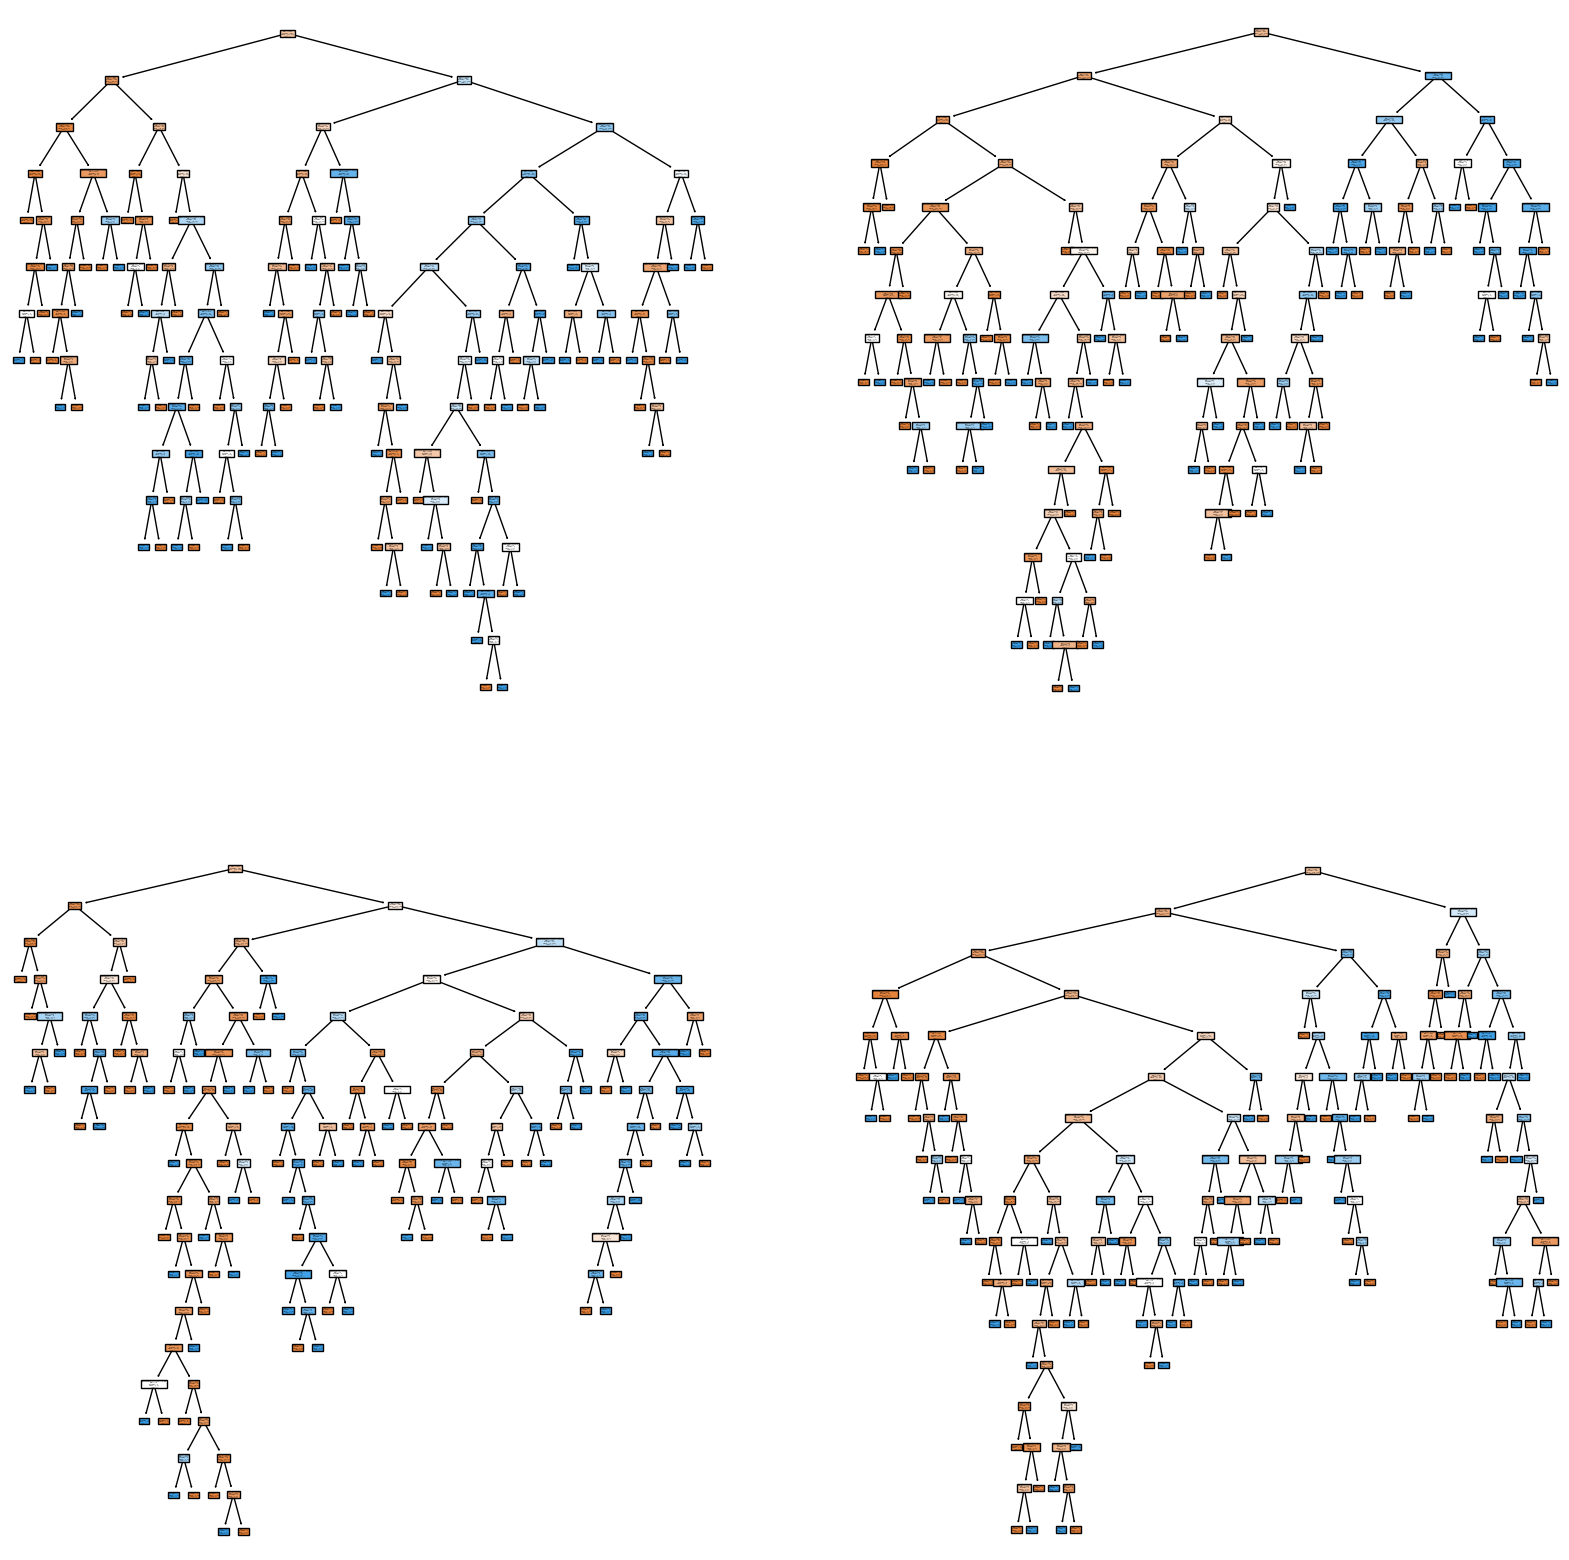

In [25]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axis = plt.subplots(2, 2, figsize = (20, 20))

# Mostramos 4 arboles de los 100 generados
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [33]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [27]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7467532467532467

In [36]:
hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "n_estimators": [50,100,150,200]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [37]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}


In [41]:
model = RandomForestClassifier(criterion = "entropy", max_depth = None, min_samples_leaf = 1, min_samples_split = 10, n_estimators = 150 , random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_split=10,
                       n_estimators=150, random_state=42)

In [43]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7597402597402597

# Bosques aleatorios para regresion.

In [69]:
train_data = pd.read_csv("X_train_sel.csv")
test_data = pd.read_csv("X_test_sel.csv")

In [70]:
X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

In [73]:
X_train.head()

,smoker_n,age,children,bmi
0,1.0,0.608696,0.4,0.107345
1,1.0,0.630435,0.0,0.224913
2,1.0,0.739130,0.0,0.239440
3,1.0,0.456522,1.0,0.493947
4,1.0,0.782609,0.6,0.148238


In [75]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [76]:
y_pred = model.predict(X_test)
y_pred

array([0.13949603, 0.06285828, 0.42848458, 0.13166189, 0.53561952,
       0.10767171, 0.00785981, 0.21297363, 0.06956709, 0.15103409,
       0.30131815, 0.09607576, 0.06534979, 0.71642959, 0.7586141 ,
       0.70942953, 0.13778487, 0.66828104, 0.13239596, 0.37237134,
       0.15245407, 0.1542386 , 0.01759835, 0.01733086, 0.17124397,
       0.15623923, 0.19317993, 0.07324204, 0.13845935, 0.15661588,
       0.10688076, 0.16758504, 0.01237367, 0.0649745 , 0.04250503,
       0.12582596, 0.02893628, 0.1338889 , 0.35529297, 0.61175083,
       0.16577833, 0.02828005, 0.16792435, 0.22179821, 0.07614136,
       0.19549116, 0.18184575, 0.19737777, 0.65615704, 0.11175889,
       0.20380386, 0.04815796, 0.09123112, 0.0090375 , 0.16110655,
       0.14245923, 0.03835813, 0.68148275, 0.20431434, 0.25036166,
       0.2052726 , 0.09307471, 0.31993791, 0.10659993, 0.15170332,
       0.09210266, 0.27405434, 0.22256464, 0.08991229, 0.01894916,
       0.08224514, 0.12840571, 0.16825897, 0.11649444, 0.12845

In [77]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 0.00563075691099104
R2 Score: 0.8576489015867563


In [78]:
from pickle import dump

dump(model, open("bosques_aleatorios.sav", "wb"))
dump(model, open("bosques_aleatorios.csv", "wb"))